In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)

Out of the box, linear regression provides a means of building models of the form:
𝑓𝐰,𝑏=𝑤0𝑥0+𝑤1𝑥1+...+𝑤𝑛−1𝑥𝑛−1+𝑏(1)
What if your features/data are non-linear or are combinations of features? For example, Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters 𝐰,𝐛 in (1) to 'fit' the equation to the training data. However, no amount of adjusting of 𝐰,𝐛 in (1) will achieve a fit to a non-linear curve.

In [3]:
# creating target data
x = np.arange(0, 20, 1) # array with elements 1-19
y = 1 + x**2
X = x.reshape(-1, 1) # -1 means calculate the number of rows such that the arrangement has 1 column
print(X)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


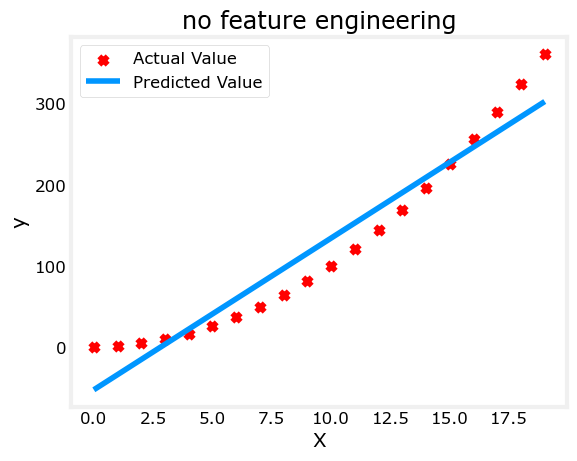

In [4]:
# look at how the points resemble a exponential function but our regression model is linear
model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

In [5]:
# creating new target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x**2 # add feature from feature engineering

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


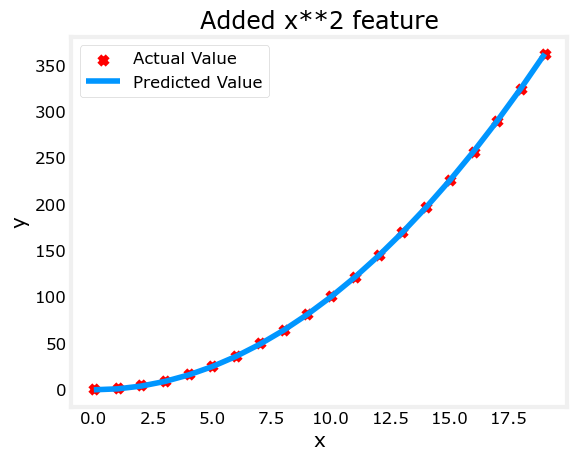

In [6]:
# look at how by squaring every value in the array x, we can also plot a exponential function
X = X.reshape(-1, 1)  # X should be a 2x matrix with 1 column
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [7]:
# creating new target data
x = np.arange(0,20,1)
y = x**2
X = np.c_[x, x**2, x**3] # add feature from feature engineering

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


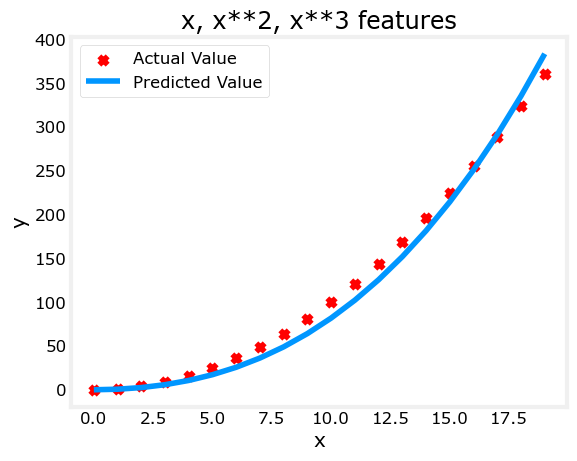

In [8]:
# we try different features to fit the data better
# we can test a variety of features like x^3 as well
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [9]:
# creating new target data
x = np.arange(0, 20, 1)
y= x**2
X = np.c_[x, x**2, x**3] # add feature from feature engineering
X_features = ['x','x^2','x^3']

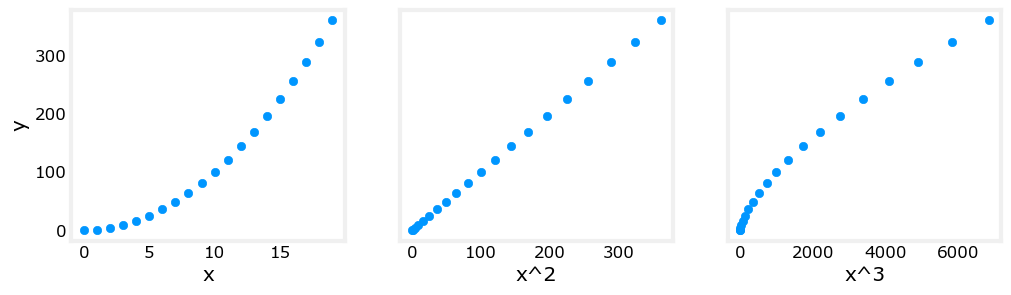

In [10]:
# look at x^2, even though the degree is 2 the graph is linear because the y values in our data set are all x squared
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [11]:
# creating new target data and normalize using the mean
x = np.arange(0, 20, 1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw x:{np.ptp(X,axis=0)}")
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized x:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw x:[  19  361 6859]
Peak to Peak range by column in Normalized x:[3.3  3.18 3.28]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


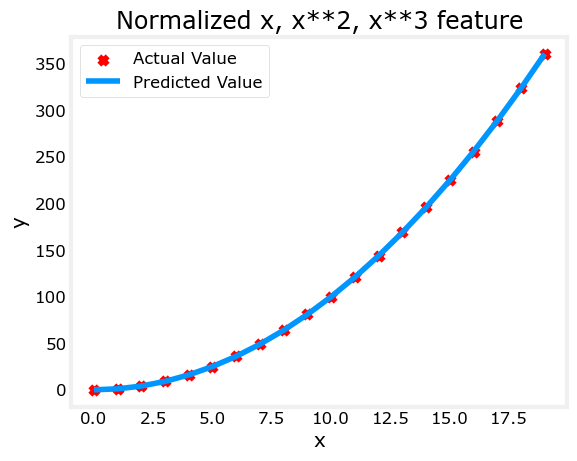

In [12]:
# now we can try using a very large alpha value to run gradient descent effiently
# note that we just normalized the x**2 nidek
x = np.arange(0,20,1)
y = x**2
X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 
model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x, x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.0073


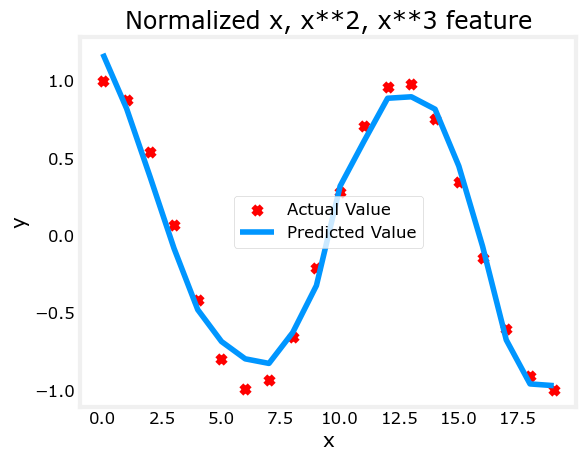

In [13]:
# with feature engineering we can even mdoel complex functions like sine and cosine from trigonometry
x = np.arange(0,20,1)
y = np.cos(x/2)
X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 
model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x, x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()
